->Check for duplicate
->PieChart Countries that organise 
->Countries that join the game through the year (x)
->Plot Graph Gender participation 
->list top 10 all medal by country. 
->List top 10 all medal by country and olympic game type
->List top 10 gold medal only country
->Plot graph different graph by gold, silver and bronze and finally all medal combined
->list of most athelete medal 
->List most collected female and male athele medal (All) and list by medal type



In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('Olympic_Games_Summary.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [5]:
# Check for duplicates
df.duplicated().sum()

0

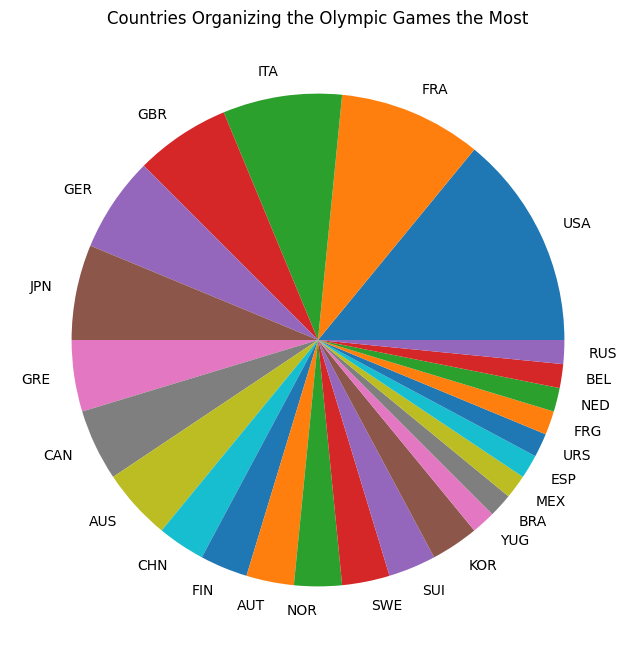

In [8]:
#making pie chart
country_counts = df['country_noc'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index)
plt.title('Countries Organizing the Olympic Games the Most')
plt.show()

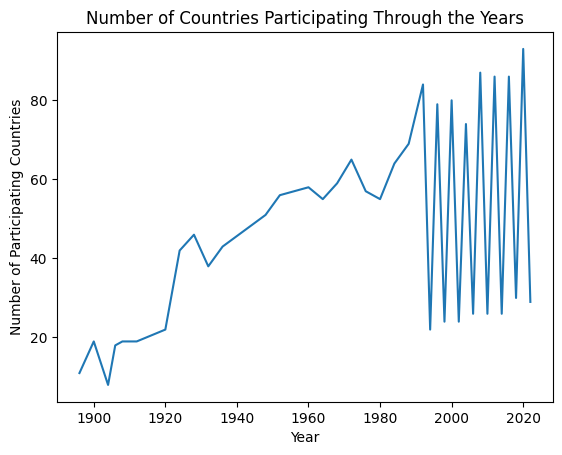

In [10]:
df = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Load the CSV file
df = pd.read_csv('Olympic_Medal_Tally_History.csv')

# If the dataset had a 'number_of_countries' column, you could use it like this:
# Group by year and count unique 'edition' to get number of participating countries per year
country_participate = df.groupby('year').size()

# Plot the number of countries participating over the years
plt.plot(country_participate.index, country_participate.values)
plt.xlabel('Year')
plt.ylabel('Number of Participating Countries')
plt.title('Number of Countries Participating Through the Years')

# Display the plot
plt.show()

In [15]:
year_2020 = df[df['year']== 2020].shape[0]
print(year_2020)
year_2018 = df[df['year']== 2018].shape[0]
print(year_2018)
year_2014 = df[df['year']== 2014].shape[0]
print(year_2014)
year_2010 = df[df['year']== 2010].shape[0]
print(year_2010)
year_2004 = df[df['year']== 2004].shape[0]
print(year_2004)
year_2008 = df[df['year']== 2008].shape[0]
print(year_2008)

93
30
26
26
74
87


In [21]:
country_medals = df.groupby('country')['gold'].sum()

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(country_medals)

pd.reset_option('display.max_rows')

country
Afghanistan                                 0
Algeria                                     5
Argentina                                  21
Armenia                                     2
Australasia                                 3
Australia                                 168
Austria                                    96
Azerbaijan                                  7
Bahrain                                     2
Barbados                                    0
Belarus                                    21
Belgium                                    50
Bermuda                                     1
Bohemia                                     0
Botswana                                    0
Brazil                                     37
Bulgaria                                   55
Burkina Faso                                0
Burundi                                     1
Cameroon                                    3
Canada                                    148
Chile                     

In [42]:
#df_grouped = df.groupby(['year', 'country'])[['gold','silver','bronze']].sum().unstack()
#print(df_grouped)

df_grouped = df.groupby('country')[['gold','silver','bronze']].sum() #sometimes when have .unstack() will produce error
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']
top10 = df_grouped.sort_values(by='total', ascending=False).head(10)
print(top10)


                            gold  silver  bronze  total
country                                                
United States               1195     969     845   3009
Soviet Union                 473     376     355   1204
Germany                      355     377     366   1098
Great Britain                312     339     337    988
France                       287     308     356    951
Italy                        271     244     274    789
People's Republic of China   285     231     197    713
Sweden                       216     233     248    697
Japan                        186     178     211    575
Norway                       208     188     173    569


<Axes: xlabel='year'>

<Figure size 1200x1200 with 0 Axes>

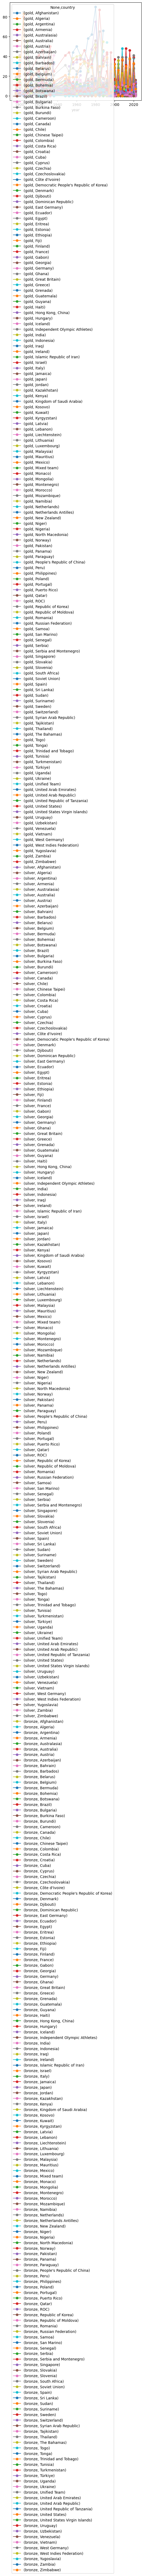

In [34]:
plt.figure(figsize=(12, 12))
df_grouped.plot(kind='line', marker='o')

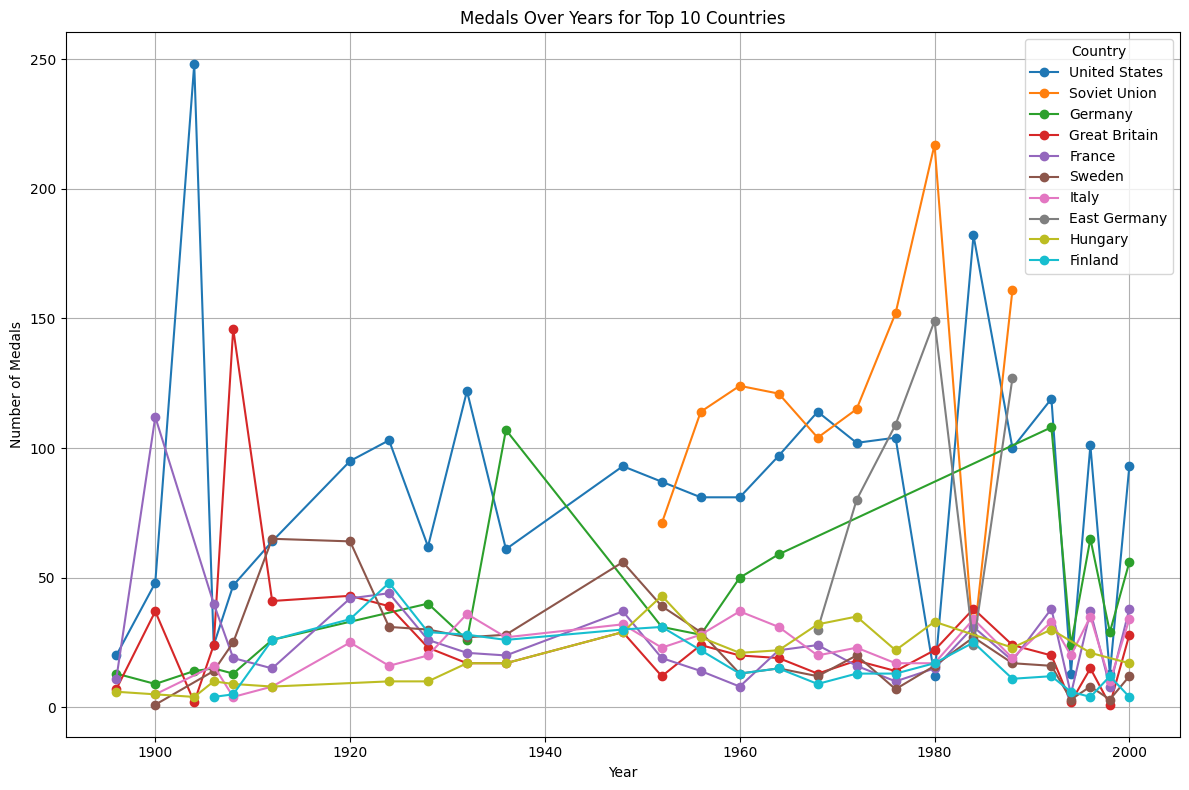

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Filter data to include only up to the year 2000
df = df[df['year'] <= 2000]

# Group by country and sum the gold, silver, and bronze medals
df_sum = df.groupby('country')[['gold', 'silver', 'bronze']].sum()

# Calculate the total number of medals for each country
df_sum['total'] = df_sum['gold'] + df_sum['silver'] + df_sum['bronze']

# Sort by total medals in descending order and get the top 10
top_10_countries = df_sum.sort_values(by='total', ascending=False).head(10).index

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df[df['country'].isin(top_10_countries)]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    plt.plot(subset['year'], subset['total'], marker='o', label=country)

plt.title('Medals Over Years for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('Olympic_Athlete_Biography.csv')


## 126 Years of Olympic Insights: Exploring the most gold medalist, PowerHouse and more!
***
The dataset is from [Kaggle: 126 Years of Historical Olympic Dataset](https://www.kaggle.com/datasets/muhammadehsan02/olympic-summer-games-paris-2024).

Based on the dataset, we are interested to know:

- Q1: Does having a higher budget result in a higher revenue and profit?
- Q2: Which genres are associated with high popularity?
- Q3: Which director produces the highest revenue movies?
- Q4: Which actor is associated with higher popularity and revenue profit?
- Q5: Which year produced movies with the highest grossing revenue?

->Check for duplicate
->PieChart Countries that organise 
->Countries that join the game through the year (x)
->Plot Graph Gender participation 
->list top 10 all medal by country. 
->List top 10 all medal by country and olympic game type
->Plot graph different graph by gold, silver and bronze and finally all medal combined
->list of most athelete medal 
->List most collected female and male athele medal (All) and list by medal type


In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd 

#Import CSV
df = pd.read_csv('Olympic_Games_Summary.csv')
df.info()

#Check for Duplicate
print('\nNumber of Duplicate: '+ str(df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB

Number of Duplicate: 0


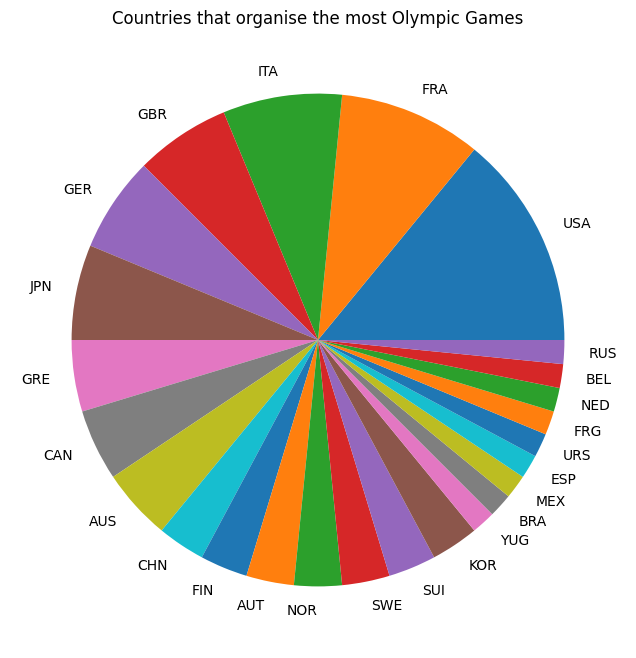

In [3]:
#Country counts
country_counts = df['country_noc'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(country_counts, labels=country_counts.index)
plt.title("Countries that organise the most Olympic Games")
plt.show()

***

As we can see USA is the number 1 country that often organise the Olympic. Now let see how much participation of athlete through the year.

***

In [4]:
#Importing the data
df2 = pd.read_csv('Olympic_Athlete_Event_Details.csv')
df2.info()

#Check for Duplicate
print('\nNumber of Duplicate: '+ str(df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB

Number of Duplicate: 0


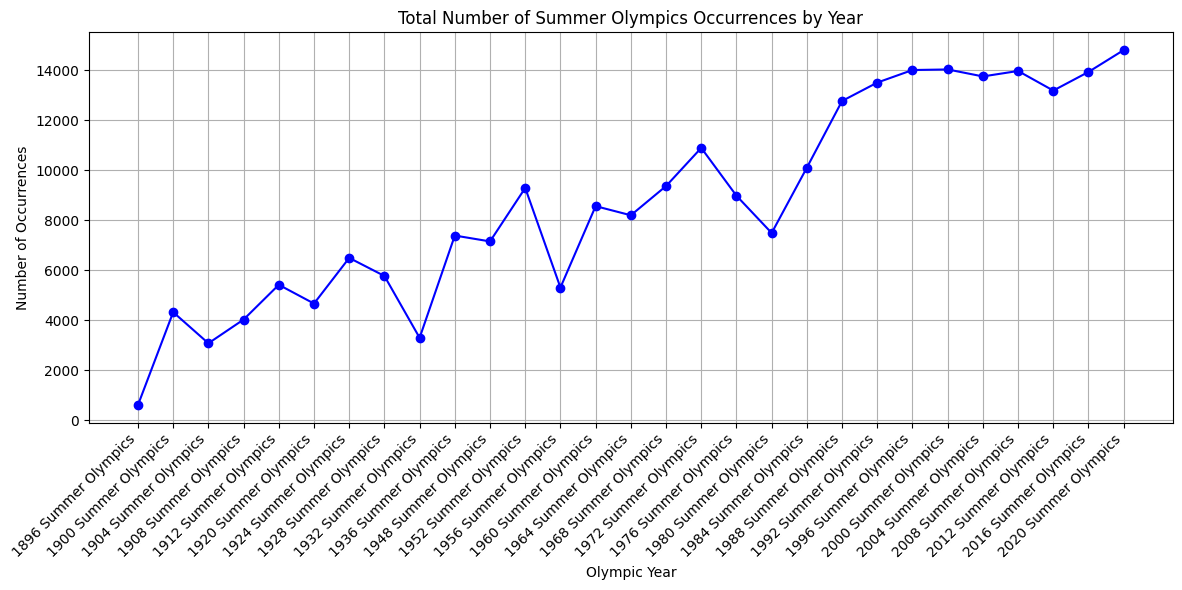

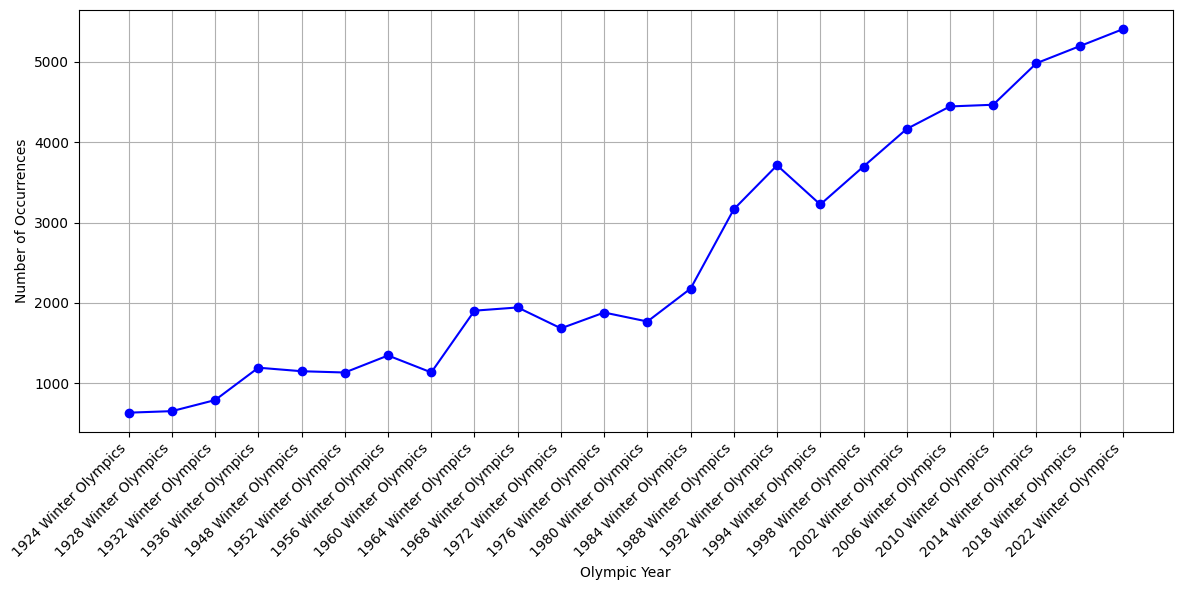

In [6]:
#Filter for Summer Olympics only
summer_olympics = df2[df2['edition'].str.contains('Summer Olympics')]

# Count the occurrences of each Summer Olympics edition
summer_counts = summer_olympics['edition'].value_counts()

# Sort the index to maintain chronological order
summer_counts = summer_counts.sort_index()

# Plot the total number of occurrences for each Summer Olympics year as a line plot
plt.figure(figsize=(12, 6))
plt.plot(summer_counts.index, summer_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Occurrences')
plt.title('Total Number of Summer Olympics Occurrences by Year')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

#Filter for Winter Olympics 
#Get all winter values
winter_olympics = df2[df2['edition'].str.contains('Winter Olympics')]

#Count the number of occurence 
winter_counts = winter_olympics['edition'].value_counts()

#Sort the Index
winter_counts = winter_counts.sort_index()

#Make the Figure
plt.figure(figsize=(12,6))
plt.plot(winter_counts.index, winter_counts.values,  marker='o', linestyle='-', color='b')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right') ## Important use this to make it clearer
plt.grid(True)
plt.tight_layout()
plt.show()


#Make a differentiation between edition id and value counts 

***

As we can see here, it seems like the Summer Olympics has more athlete joining compared to the Winter Olympics

***

In [7]:
#df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')
#medal_all = df3.groupby('country')[['gold', 'silver', 'bronze']].sum()
#top10 = medal_all.sort_values(by='total', ascending=False).head(10)
#print(top10)

#Import CSV
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

#Count Medal
medal_all = df3.groupby('country')[['gold', 'silver', 'bronze']].sum()
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

#Top 10 Countries with highest total Medal through the year
top_10 = medal_all.sort_values(by='total', ascending=False).head(10)
print('Countries with highest total Medal through the year')
print(top_10)



Top 10 Countries Medal
                            gold  silver  bronze  total
country                                                
United States               1195     969     845   3009
Soviet Union                 473     376     355   1204
Germany                      355     377     366   1098
Great Britain                312     339     337    988
France                       287     308     356    951
Italy                        271     244     274    789
People's Republic of China   285     231     197    713
Sweden                       216     233     248    697
Japan                        186     178     211    575
Norway                       208     188     173    569


In [12]:
# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter for Summer Olympics first
summer_medals = medal_all[medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Reset index to make 'country' a column
summer_medals = summer_medals.reset_index()

# Group by country and sum the medals across all Summer Olympics years
country_summer_medals = summer_medals.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum()

# Sort by total medals and select top 10
top_10_summer = country_summer_medals.sort_values(by='total', ascending=False).head(10)

# Print the top 10
print('Countries with highest total Medal through the year in Summer Olympics')
print(top_10_summer)

Countries with highest total Medal through the year in Summer Olympics
                            gold  silver  bronze  total
country                                                
United States               1070     841     744   2655
Soviet Union                 395     319     296   1010
Great Britain                291     323     313    927
Germany                      237     264     290    791
France                       231     257     285    773
People's Republic of China   263     199     174    636
Italy                        222     193     214    629
Australia                    162     170     209    541
Hungary                      182     156     177    515
Sweden                       146     177     181    504


In [14]:
# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter for Summer Olympics first
winter_medals = medal_all[medal_all.index.get_level_values('edition').str.contains('Winter Olympics')]

# Reset index to make 'country' a column
winter_medals = winter_medals.reset_index()

# Group by country and sum the medals across all Summer Olympics years
country_winter_medals = winter_medals.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum()

# Sort by total medals and select top 10
top_10_winter = country_winter_medals.sort_values(by='total', ascending=False).head(10)

# Print the top 10
print('Countries with highest total Medal through the year in Summer Olympics')
print(top_10_winter)

Countries with highest total Medal through the year in Summer Olympics
               gold  silver  bronze  total
country                                   
Norway          148     134     123    405
United States   113     122      95    330
Germany         112     104      70    286
Austria          71      88      91    250
Canada           77      72      76    225
Soviet Union     78      57      59    194
Sweden           65      51      60    176
Finland          45      65      65    175
Switzerland      63      47      58    168
Netherlands      53      49      45    147


***

From here we can concluded (Without Soviet Union as it is longer exist since 1991)
- Top 3 Countries for highest collected medal: United States, Great Britain, Germany
- Highest Gold Medalist Collected : United States
- Highest Gold Medalist Collected for Summer Olympics : United States
- Highest Gold Medalist Collected for Winter Olympics : Norway
- The only Asian Country in the Top 10 Most collected Medal : People's Republic of China and Japan

Now let's make a plot Graph for this top 10 countries.

***

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter for Summer Olympics only
summer_medals = medal_all[medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = summer_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries)]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    plt.plot(subset['year'], subset['total'], marker='o', label=country)

plt.title('Medals Over Years for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter out Summer Olympics, leaving Winter Olympics
winter_medals = medal_all[~medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = winter_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries) & df3['edition'].str.contains('Winter Olympics')]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    plt.plot(subset['year'], subset['total'], marker='o', label=country)

plt.title('Medals Over Years for Top 10 Countries in Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


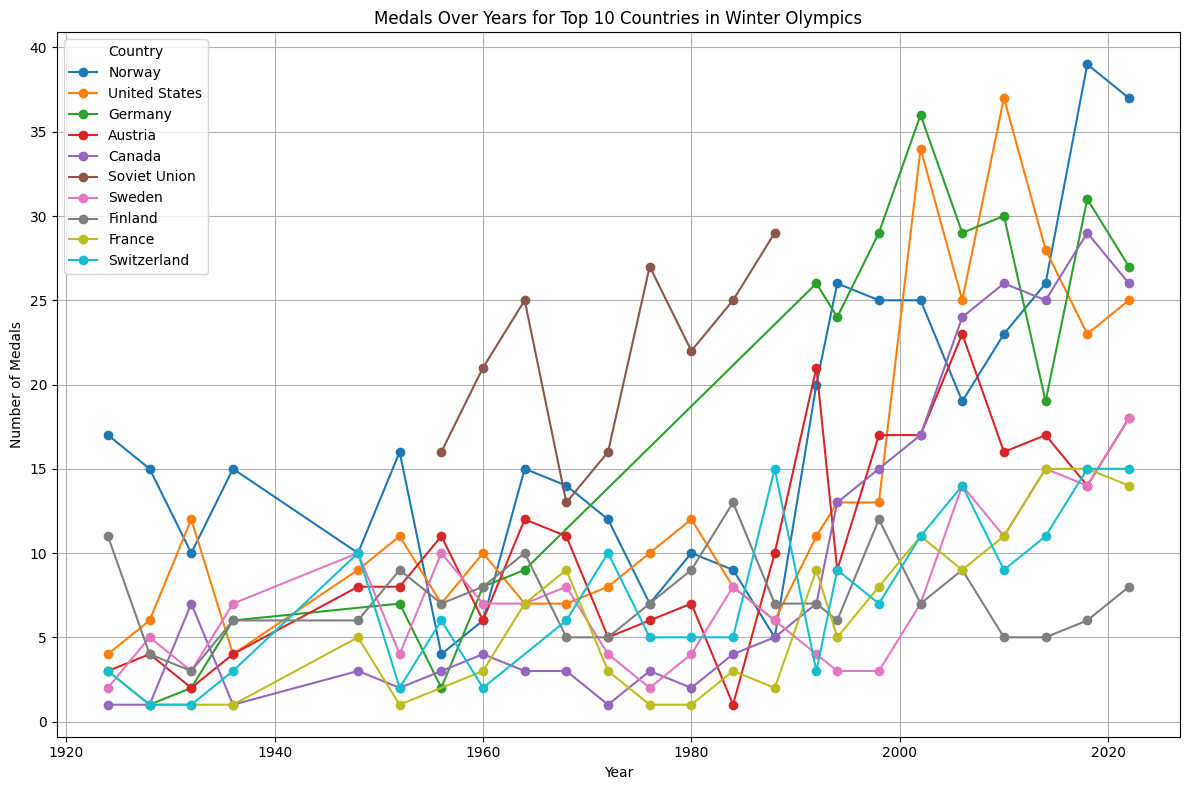

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter out Summer Olympics, leaving Winter Olympics
winter_medals = medal_all[~medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = winter_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries) & df3['edition'].str.contains('Winter Olympics')]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    plt.plot(subset['year'], subset['total'], marker='o', label=country)

plt.title('Medals Over Years for Top 10 Countries in Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


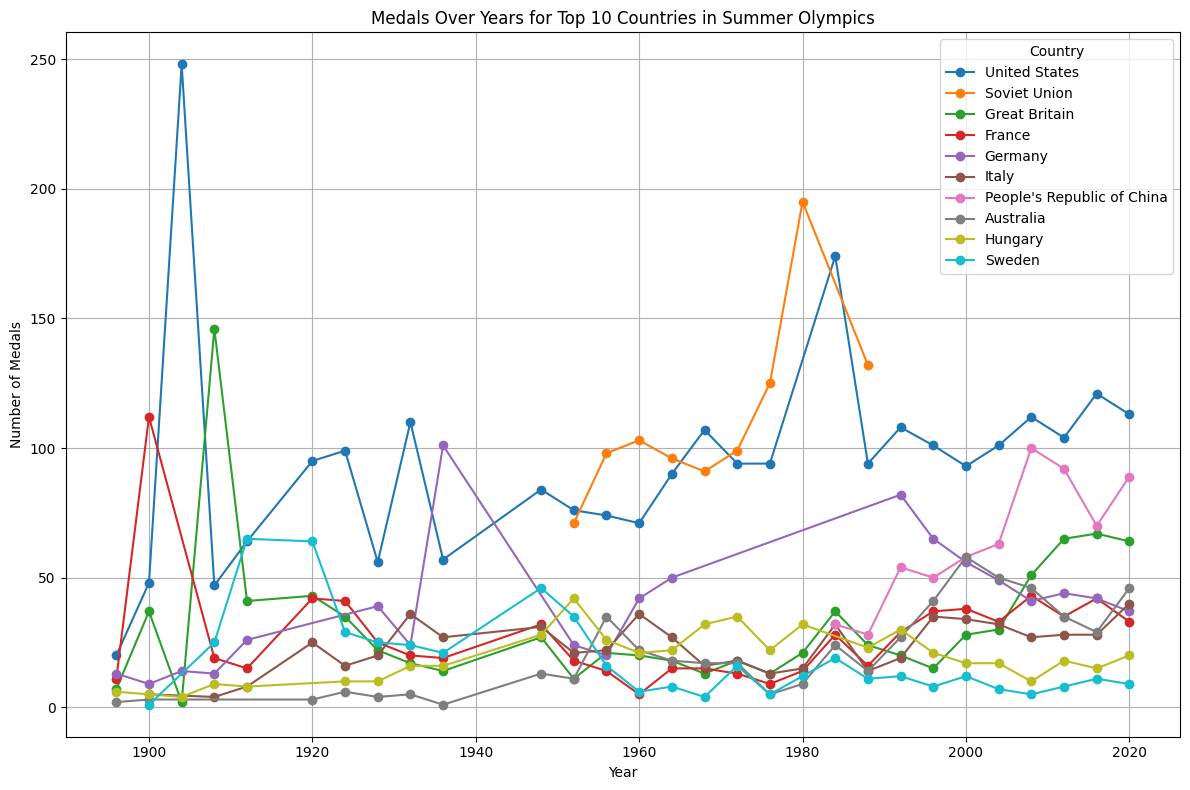

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter out Winter Olympics, leaving Summer Olympics
summer_medals = medal_all[~medal_all.index.get_level_values('edition').str.contains('Winter Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = summer_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries) & df3['edition'].str.contains('Summer Olympics')]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    plt.plot(subset['year'], subset['total'], marker='o', label=country)

plt.title('Medals Over Years for Top 10 Countries in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


***

We can see from the graph how many have the countries collected

***

import plotly.express as px

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter for Summer Olympics only
summer_medals = medal_all[medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = summer_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries)]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Create an interactive line plot with Plotly
fig = px.line(df_grouped, x='year', y='total', color='country', 
              markers=True, 
              hover_data=['country', 'gold', 'silver', 'bronze', 'total'], 
              title='Medals Over Years for Top 10 Countries')

# Show the plot
fig.show()


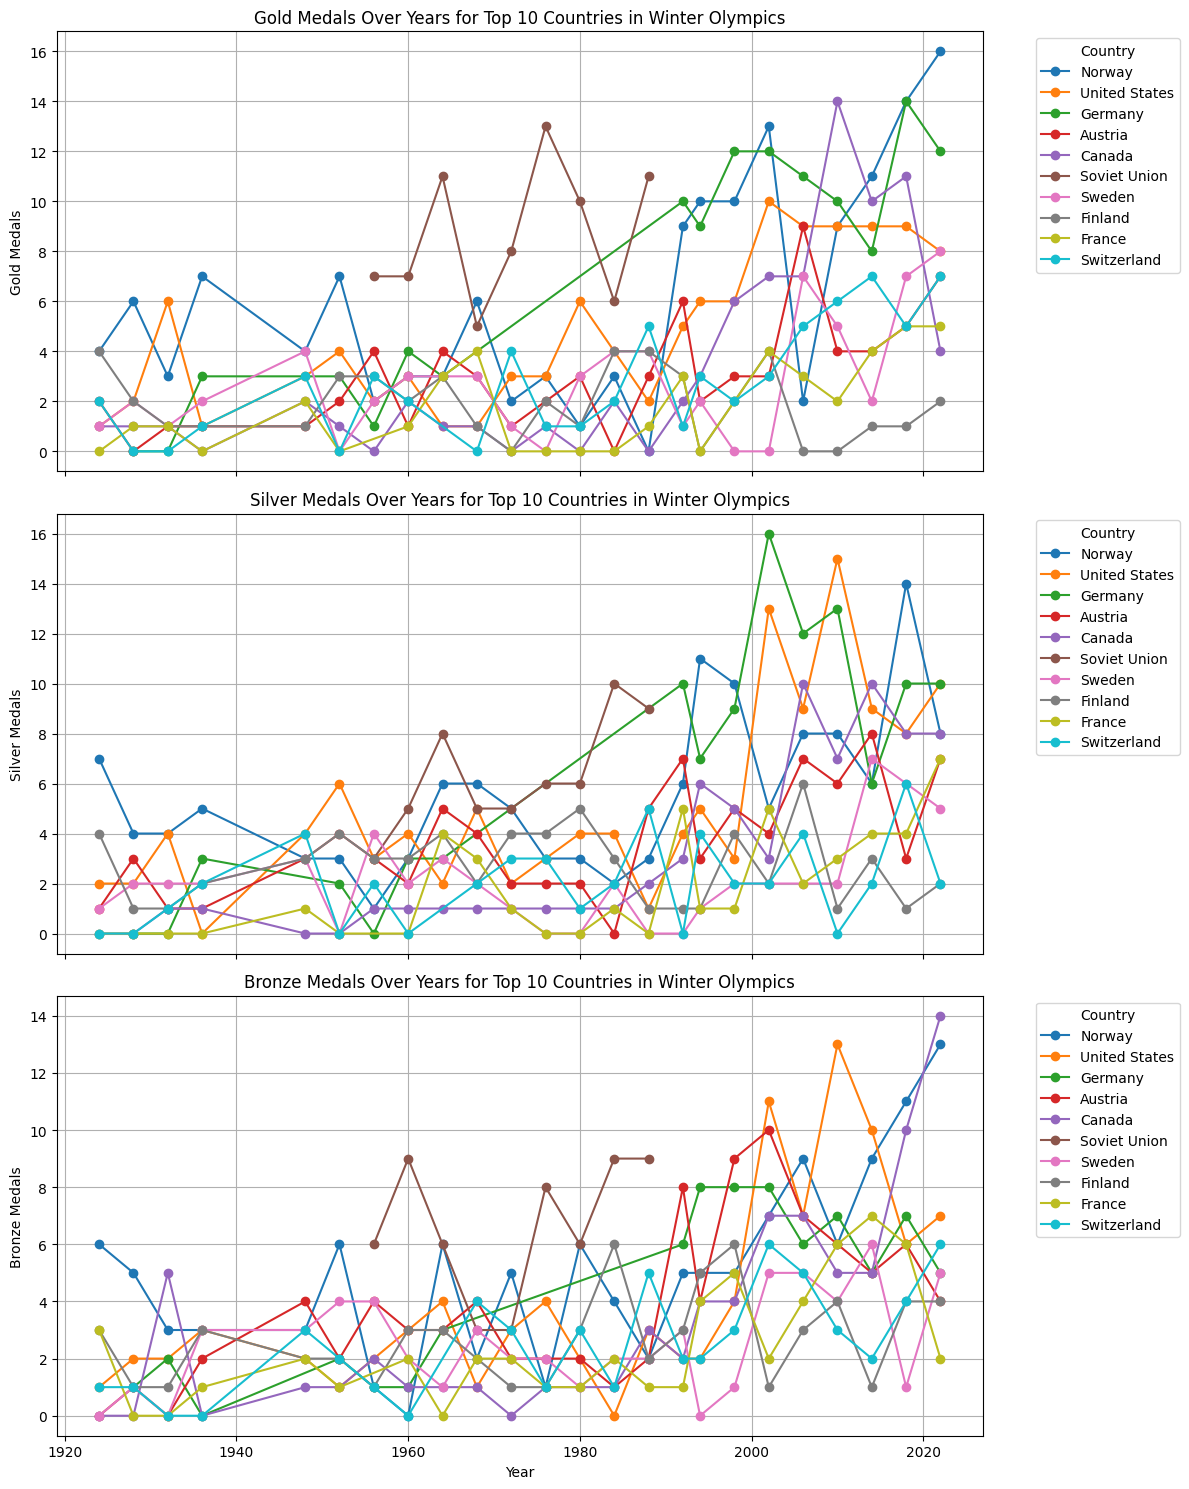

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Filter out Summer Olympics, leaving Winter Olympics
winter_medals = medal_all[~medal_all.index.get_level_values('edition').str.contains('Summer Olympics')]

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = winter_medals.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries) & df3['edition'].str.contains('Winter Olympics')]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Create a total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot gold medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[0].plot(subset['year'], subset['gold'], marker='o', label=country)

axs[0].set_title('Gold Medals Over Years for Top 10 Countries in Winter Olympics')
axs[0].set_ylabel('Gold Medals')
axs[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

# Plot silver medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[1].plot(subset['year'], subset['silver'], marker='o', label=country)

axs[1].set_title('Silver Medals Over Years for Top 10 Countries in Winter Olympics')
axs[1].set_ylabel('Silver Medals')
axs[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

# Plot bronze medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[2].plot(subset['year'], subset['bronze'], marker='o', label=country)

axs[2].set_title('Bronze Medals Over Years for Top 10 Countries in Winter Olympics')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Bronze Medals')
axs[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].grid(True)

plt.tight_layout()
plt.show()


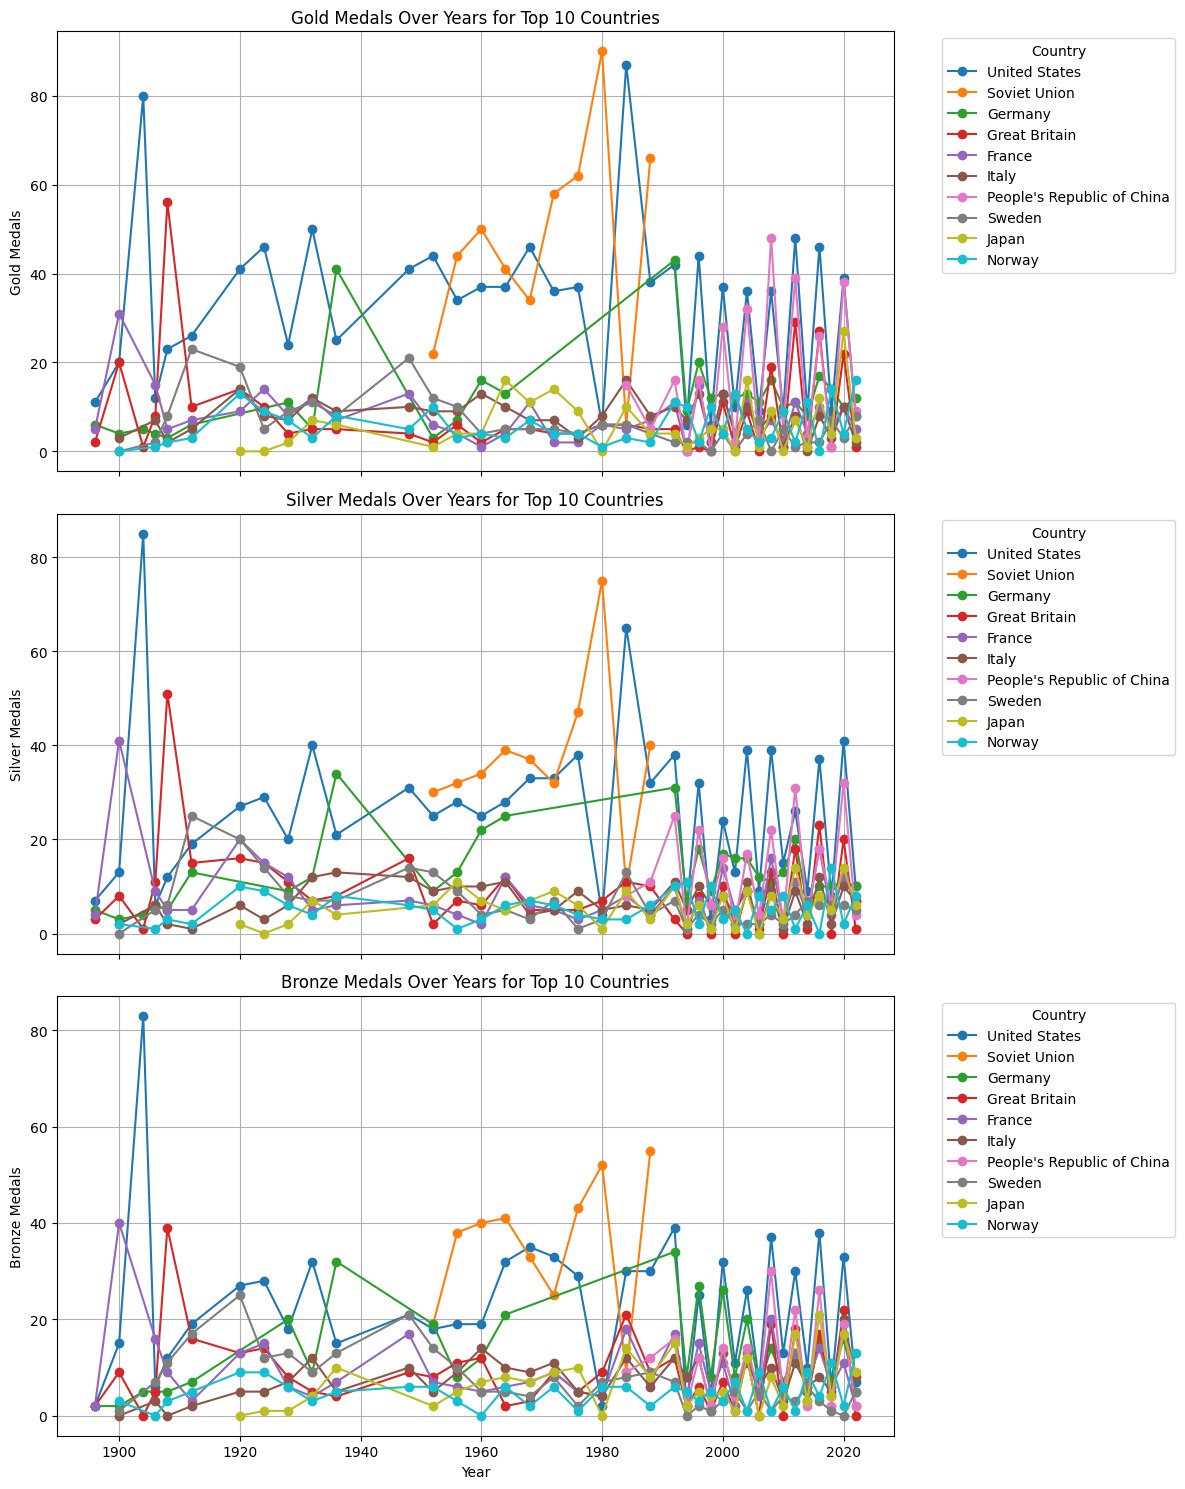

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3 contains the data
df3 = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Group by edition and country, then sum the medals
medal_all = df3.groupby(['edition', 'country'])[['gold', 'silver', 'bronze']].sum()

# Create a total medals column
medal_all['total'] = medal_all['gold'] + medal_all['silver'] + medal_all['bronze']

# Sort by total medals in descending order and get the top 10 countries
top_10_countries = medal_all.groupby('country')['total'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter the original DataFrame to include only the top 10 countries
df_top_10 = df3[df3['country'].isin(top_10_countries)]

# Group by year and country and sum the medals
df_grouped = df_top_10.groupby(['year', 'country'])[['gold', 'silver', 'bronze']].sum().reset_index()

# Calculate the total number of medals for each country by year
df_grouped['total'] = df_grouped['gold'] + df_grouped['silver'] + df_grouped['bronze']

# Plot the data
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot gold medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[0].plot(subset['year'], subset['gold'], marker='o', label=country)

axs[0].set_title('Gold Medals Over Years for Top 10 Countries')
axs[0].set_ylabel('Gold Medals')
axs[0].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

# Plot silver medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[1].plot(subset['year'], subset['silver'], marker='o', label=country)

axs[1].set_title('Silver Medals Over Years for Top 10 Countries')
axs[1].set_ylabel('Silver Medals')
axs[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

# Plot bronze medals
for country in top_10_countries:
    subset = df_grouped[df_grouped['country'] == country]
    axs[2].plot(subset['year'], subset['bronze'], marker='o', label=country)

axs[2].set_title('Bronze Medals Over Years for Top 10 Countries')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Bronze Medals')
axs[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Load the data
df = pd.read_csv('Olympic_Athlete_Event_Details.csv')

# Count the total number of medals by athlete
# This counts all rows for each athlete regardless of the medal type
medal_count = df.groupby('athlete').size()

# Sort the athletes by the total number of medals in descending order
top_medalists = medal_count.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for better readability
top_medalists_df = top_medalists.reset_index(name='total_medals')

# Display the top 10 medalists
print(top_medalists_df)


               athlete  total_medals
0        Tait McKenzie            58
1    Heikki Savolainen            39
2         Josy Stoffel            38
3  Ioannis Theofilakis            34
4          Takashi Ono            33
5       Andreas Wecker            32
6          Jean Jacoby            32
7       Michel Mathiot            31
8          Hans Sauter            31
9            Al Jochim            31


In [37]:
import pandas as pd

# Load the data
df = pd.read_csv('Olympic_Athlete_Event_Details.csv')

# Filter for gold medals
gold_medals = df[df['medal'] == 'Silver']

# Count the number of gold medals by athlete
gold_count = gold_medals.groupby('athlete').size()

# Sort the athletes by number of gold medals in descending order
top_gold_medalists = gold_count.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for better readability
top_gold_medalists_df = top_gold_medalists.reset_index(name='gold_medals')

# Display the top 10 gold medalists
print(top_gold_medalists_df)


              athlete  gold_medals
0     Charlotte Kalla            6
1     Mikhail Voronin            6
2   Shirley Babashoff            6
3  Aleksandr Dityatin            6
4     Larisa Latynina            5
5       Bogdan Musiol            5
6     Raisa Smetanina            5
7        Duncan Scott            5
8     Aleksandr Popov            5
9          Yury Titov            5


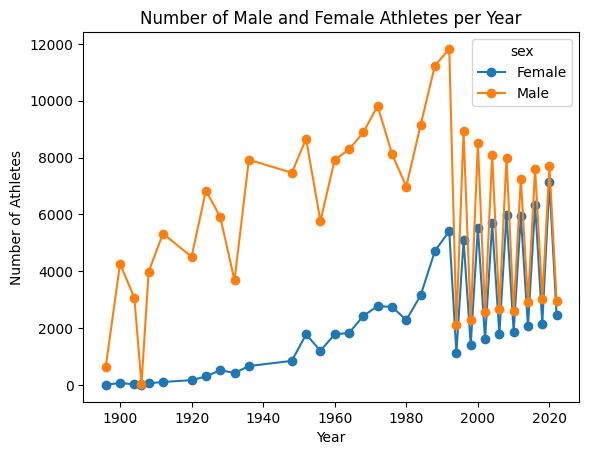

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
event_details_df = pd.read_csv('Olympic_Athlete_Event_Details.csv')
biography_df = pd.read_csv('Olympic_Athlete_Biography.csv')

# Merge the two DataFrames based on 'athlete_id'
merged_df = pd.merge(event_details_df, biography_df, on='athlete_id')

# Extract the year from the 'edition' column (assuming 'edition' has both summer and winter in this format)
merged_df['year'] = merged_df['edition'].str.extract(r'(\d{4})').astype(int)

# Group the data by year and sex, and count the occurrences
athlete_count_by_year = merged_df.groupby(['year', 'sex']).size().unstack().fillna(0)

# Plot the data as a line plot
athlete_count_by_year.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Male and Female Athletes per Year')

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

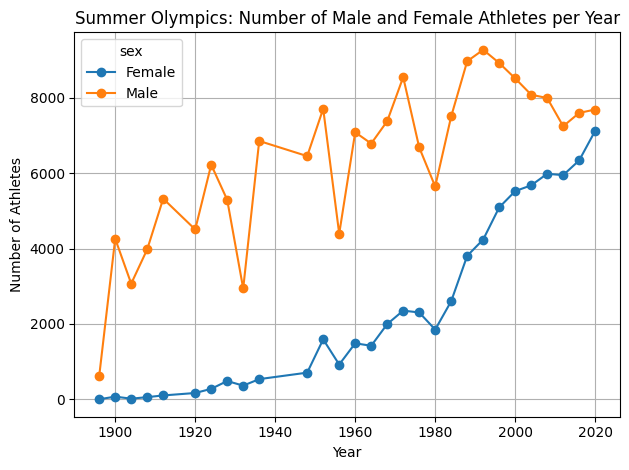

<Figure size 1200x600 with 0 Axes>

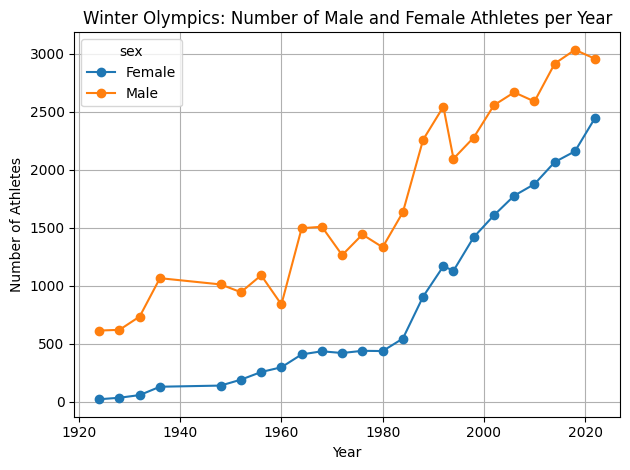

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
event_details_df = pd.read_csv('Olympic_Athlete_Event_Details.csv')
biography_df = pd.read_csv('Olympic_Athlete_Biography.csv')

# Merge the two DataFrames based on 'athlete_id'
merged_df = pd.merge(event_details_df, biography_df, on='athlete_id')

# Extract the year and season (Summer or Winter) from the 'edition' column
merged_df['year'] = merged_df['edition'].str.extract(r'(\d{4})').astype(int)
merged_df['season'] = merged_df['edition'].str.extract(r'(Summer|Winter)')

# Separate data for Summer and Winter Olympics
summer_df = merged_df[merged_df['season'] == 'Summer']
winter_df = merged_df[merged_df['season'] == 'Winter']

# Group the data by year and sex, and count the occurrences for Summer Olympics
summer_athlete_count_by_year = summer_df.groupby(['year', 'sex']).size().unstack().fillna(0)

# Group the data by year and sex, and count the occurrences for Winter Olympics
winter_athlete_count_by_year = winter_df.groupby(['year', 'sex']).size().unstack().fillna(0)

# Plot the data for Summer Olympics
plt.figure(figsize=(12, 6))
summer_athlete_count_by_year.plot(kind='line', marker='o', title="Summer Olympics: Number of Male and Female Athletes per Year")
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.tight_layout()

# Plot the data for Winter Olympics
plt.figure(figsize=(12, 6))
winter_athlete_count_by_year.plot(kind='line', marker='o', title="Winter Olympics: Number of Male and Female Athletes per Year")
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.tight_layout()

# Show both plots
plt.show()


In [41]:
import pandas as pd

# Load the CSV files into DataFrames
event_details_df = pd.read_csv('Olympic_Athlete_Event_Details.csv')
biography_df = pd.read_csv('Olympic_Athlete_Biography.csv')

# Merge the two DataFrames based on 'athlete_id'
merged_df = pd.merge(event_details_df, biography_df, on='athlete_id')

# Filter for rows where medals were won (i.e., non-empty 'medal' values)
medalist_df = merged_df[merged_df['medal'].notnull() & (merged_df['medal'] != '')]

# Group by athlete and sex, then count the number of medals they won
medals_by_athlete = medalist_df.groupby(['athlete', 'sex'])['medal'].count().reset_index()

# Sort the DataFrame by the number of medals in descending order
medals_by_athlete = medals_by_athlete.sort_values(by='medal', ascending=False)

# Get top male and female athletes separately
top_male_athletes = medals_by_athlete[medals_by_athlete['sex'] == 'Male'].head(10)  # Top 10 male athletes
top_female_athletes = medals_by_athlete[medals_by_athlete['sex'] == 'Female'].head(10)  # Top 10 female athletes

# Display the results
print("Top 10 Male Medalists:")
print(top_male_athletes)

print("\nTop 10 Female Medalists:")
print(top_female_athletes)


Top 10 Male Medalists:
                    athlete   sex  medal
20508        Michael Phelps  Male     28
21909     Nikolay Andrianov  Male     15
7438    Edoardo Mangiarotti  Male     13
27408           Takashi Ono  Male     13
22309  Ole Einar Bjørndalen  Male     13
4124         Boris Shakhlin  Male     13
22731           Paavo Nurmi  Male     12
1101          Aleksey Nemov  Male     12
3888           Bjørn Dæhlie  Male     12
25347           Ryan Lochte  Male     12

Top 10 Female Medalists:
                athlete     sex  medal
17255   Larisa Latynina  Female     18
19512     Marit Bjørgen  Female     15
14012    Jenny Thompson  Female     13
12754        Ireen Wüst  Female     13
21466  Natalie Coughlin  Female     12
6218        Dara Torres  Female     12
12867     Isabell Werth  Female     12
1528      Allyson Felix  Female     11
2761    Arianna Fontana  Female     11
29763    Věra Čáslavská  Female     11
